# 🤖 AI, CA3, Machine Learning 📚  

* **Name** : Simin 🖊  
* **Last Name** : Eskandari 📝  
* **SID** : 810100240 🆔

## 🧹 Data Preprocessing  
Implement all your preprocessing in this section, following the guidelines provided in the project documentation 📄.  

### 📥 Load Dataset  
In this subsection, you should load the dataset as a pandas dataframe 🐼.

In [327]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


# Load the dataset
file_path = 'hotels_in_europe.csv'
df = pd.read_csv(file_path)

### 🛠 Handling Missing Values 💡
In this subsection, you are supposed to handle null and missing values, following regular techinuques, used in this context

In [328]:
# Fill missing values and convert columns to appropriate types
df['price'] = df['price'].fillna('').astype(str)
df['review'] = df['review'].fillna('0 reviews').astype(str)
df['nights'] = df['nights'].fillna('').astype(str)
df['adults'] = df['adults'].fillna('').astype(str)

# Handle the price column
df['price_numeric'] = (
    df['price']
    .str.replace('IRR', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .replace('', '0')  # Replace empty strings with '0'
    .astype(float)
)

### ➕ Additional Columns  
In this subsection, you should add some additional columns to the dataframe, according to the project documentation 📄.

In [329]:
# Extract reviews count
df['reviews_count'] = df['review'].str.extract(r'(\d[\d,]*)').fillna('0').replace(',', '', regex=True).astype(int)

# Extract quality rating (only the first match)
df['quality_numeric'] = df['quality'].str.extract(r'(\d+(\.\d+)?)')[0].astype(float)

# Extract size
df['size_numeric'] = df['size'].str.extract(r'(\d+)')[0].astype(float)

# Extract numeric values for nights and adults
df['nights_numeric'] = df['nights'].str.extract(r'(\d+)').fillna(0).astype(int)
df['adults_numeric'] = df['adults'].str.extract(r'(\d+)').fillna(0).astype(int)

# Binary flag for free cancellation
df['free_cancellation_flag'] = df['free_cancellation'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

# Handle distance from center and rating
df['distance_from_center'] = pd.to_numeric(df['distance_from_center'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# One-hot encoding for room_type
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)


### 🧩 Manipulate Columns 🔢  
In this subsection, you should extract numerical values from columns and also convert categorical data to numerical values,as described in the project documentation 📄.

In [330]:
# Impute missing values for numeric columns
numeric_columns = ['price_numeric', 'reviews_count', 'size_numeric', 
                   'distance_from_center', 'nights_numeric', 'adults_numeric']
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

### 🏷 Assigning Labels  
In this subsection, we want to assign labels to hotels 🏨, according to their price 💰.  
We have two labels:  
- **0** for hotels with a price less than a threshold 🟢.  
- **1** for those with higher prices 🔴.  

To determine the threshold, we use the median of prices 📊.  
In the first step, complete the following function. Then, you should use the `apply` method of pandas 🐼 to assign labels to each hotel.

In [331]:
def assign_label(x, column):
    df['price'] = df[column].apply(lambda x: 1 if x >= 2000000 else 0)

    categorical_columns = ['price_numeric', 'reviews_count', 'size_numeric']
    label_encoders = {}
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])


## 📊 Data Visualization  
Research and explore various data visualization techniques 🔍 to identify the best options for your project 🎯. Different approaches may be suitable for different aspects of your data 📈.

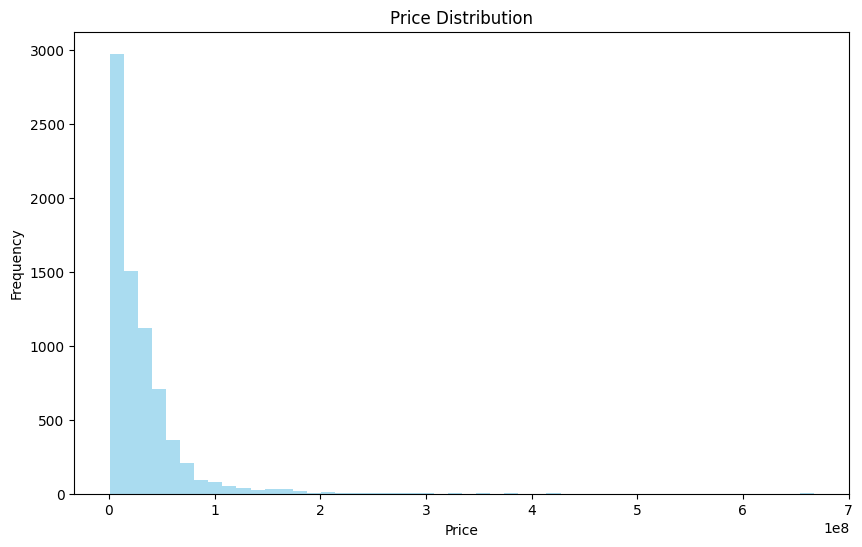

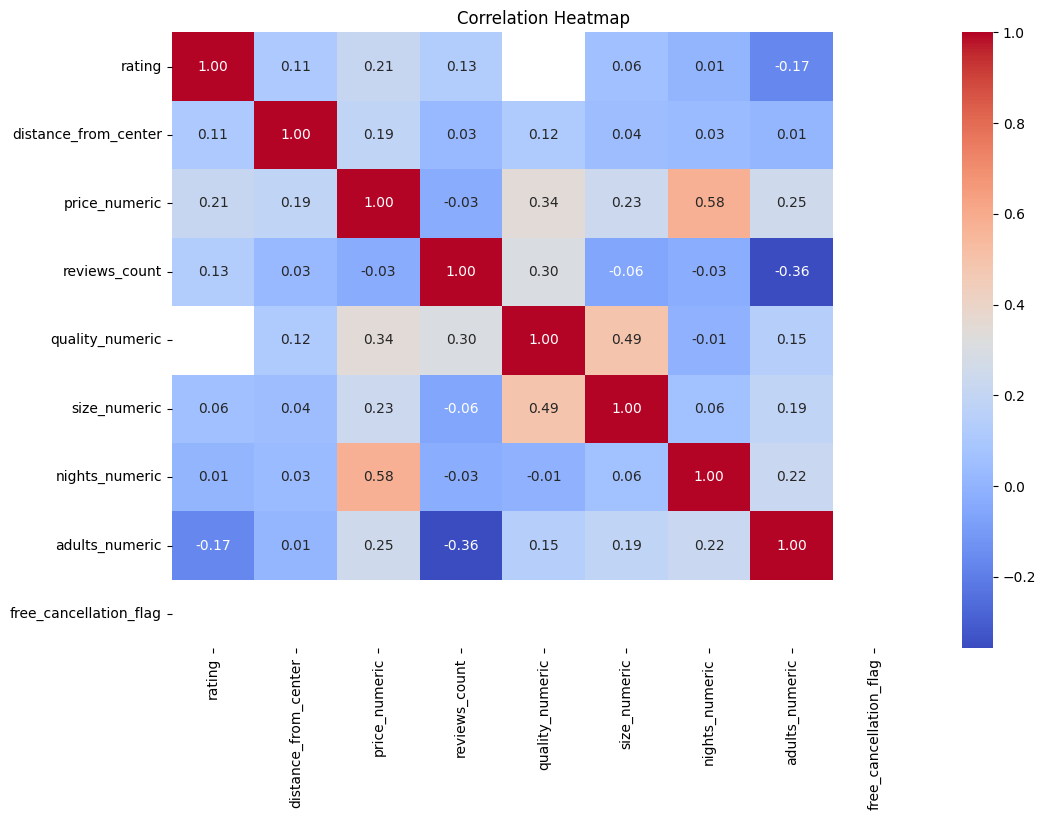

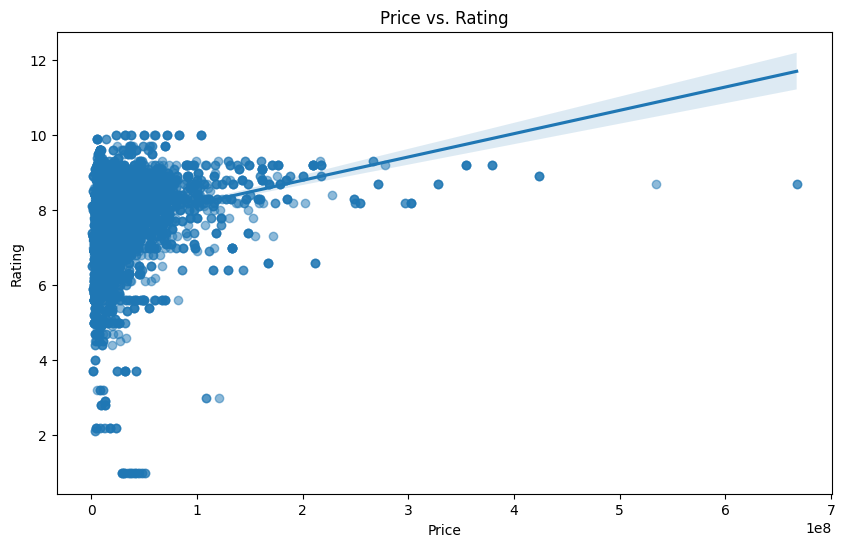

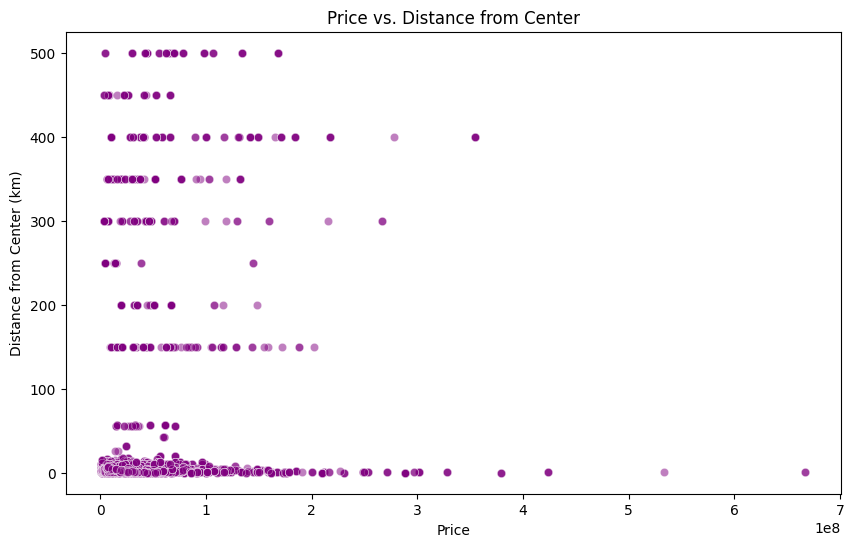

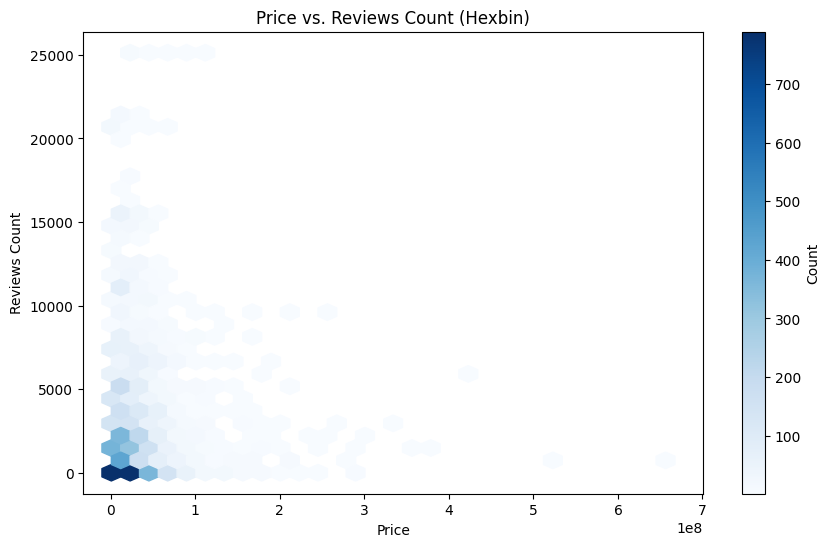

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure that 'price_numeric' and 'distance_from_center' are numeric
df['price_numeric'] = pd.to_numeric(df['price_numeric'], errors='coerce')
df['distance_from_center'] = pd.to_numeric(df['distance_from_center'], errors='coerce')

# Drop rows where 'price_numeric' or 'distance_from_center' is NaN (if necessary)
df = df.dropna(subset=['price_numeric', 'distance_from_center'])

# Histogram of price distribution
plt.figure(figsize=(10, 6))
df['price_numeric'].plot(kind='hist', bins=50, alpha=0.7, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Heatmap of correlations (only numeric columns)
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot and regression line (Price vs. Rating)
plt.figure(figsize=(10, 6))
sns.regplot(x='price_numeric', y='rating', data=df, scatter_kws={'alpha': 0.5})
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Scatter plot (Price vs. Distance from Center)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_numeric', y='distance_from_center', alpha=0.5, color='purple', data=df)
plt.title('Price vs. Distance from Center')
plt.xlabel('Price')
plt.ylabel('Distance from Center (km)')
plt.show()

# Hexbin plot (Price vs. Reviews Count)
plt.figure(figsize=(10, 6))
plt.hexbin(df['price_numeric'], df['reviews_count'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('Price vs. Reviews Count (Hexbin)')
plt.xlabel('Price')
plt.ylabel('Reviews Count')
plt.show()


## 🏷 Classification  
In this section, we will go through the classification pipeline. We will deploy several machine learning models to classify hotels based on their price 💵. Finally, you will implement a boosting algorithm from scratch 🛠 and compare its performance with the library implementation 📚.

### 🔀 Train-Test Split  
You should divide the data into a training set and a test set. Use 20% of the data for testing and 80% for training 📊.

In [333]:
# Inspect column names to ensure 'price_label' exists
print(df.columns)

# If 'price_label' exists, proceed with splitting the data
if 'price_label' in df.columns:
    X = df.drop(['price_label'], axis=1)
    y = df['price_label']
    
    # Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
else:
    # If 'price_label' does not exist, create it (for example, using price ranges)
    bins = [0, 50, 100, 200, float('inf')]
    labels = ['Low', 'Medium', 'High', 'Very High']
    df['price_label'] = pd.cut(df['price_numeric'], bins=bins, labels=labels, right=False)
    
    # Proceed with splitting the data
    X = df.drop(['price_label'], axis=1)
    y = df['price_label']
    
    # Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Index(['name', 'location', 'price', 'rating', 'quality', 'review', 'bed',
       'size', 'distance_from_center', 'nights',
       ...
       'room_type_Two-Bedroom Apartment with Sofa Bed',
       'room_type_Two-Bedroom Corner Suite',
       'room_type_Two-Bedroom Deluxe Apartment with Balcony',
       'room_type_Two-Bedroom Family Suite with Terrace',
       'room_type_Two-Bedroom House', 'room_type_Two-Bedroom Suite',
       'room_type_Two-Bedroom Suite XXL + terrace',
       'room_type_Two-Double Adjoining Rooms', 'room_type_Urban Double Room',
       'room_type_Villa'],
      dtype='object', length=444)


### 🌐 Normalization  
One of the most important steps in the classification pipeline is normalization. You will be asked about the importance of this step ⚙️.

In [334]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for normalization
numerical_features = [
    'price_numeric', 
    'reviews_count', 
    'size_numeric', 
    'distance_from_center', 
    'nights_numeric', 
    'adults_numeric', 
    'quality_numeric'
]

# Initialize the scaler
scaler = StandardScaler()  # For standard normalization (z-score scaling)
# scaler = MinMaxScaler()  # Use this for min-max normalization if preferred

# Normalize numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the normalized dataset
print("Normalized dataset:")
print(df[numerical_features].head())
# Normalize training and testing data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Check normalized train and test sets
print("Normalized training set sample:")
print(X_train[numerical_features].head())


Normalized dataset:
   price_numeric  reviews_count  size_numeric  distance_from_center  \
0      -0.584451       0.081585     -1.634488             -0.276576   
1      -0.752634       0.747035      0.000000             -0.243822   
2      -0.594265      -0.113403      0.000000             -0.258379   
3      -0.623041      -0.386336      0.000000             -0.248675   
4      -0.585427      -0.433052      0.000000             -0.249888   

   nights_numeric  adults_numeric  quality_numeric  
0       -1.121344       -1.938702              NaN  
1       -1.121344       -1.938702              NaN  
2       -1.121344       -1.938702              NaN  
3       -1.121344       -1.938702              NaN  
4       -1.121344       -1.938702              NaN  
Normalized training set sample:
      price_numeric  reviews_count  size_numeric  distance_from_center  \
613       -0.723167      -0.313053      0.003995             -0.281074   
6232      -0.570999      -0.216490      0.003995       

### 🚀 Deploying Sklearn Models  
In this subsection, you should use built-in models from the sklearn library for the classification task. Don't forget to show the complete classification report, including the confusion matrix, precision, recall, F1-score, and accuracy 📊. You will be asked about these metrics 📈.

#### 📉 Gaussian Naive Bayes

Gaussian Naive Bayes Accuracy: 1.00

Gaussian Naive Bayes Confusion Matrix:
[[2197]]

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

   Very High       1.00      1.00      1.00      2197

    accuracy                           1.00      2197
   macro avg       1.00      1.00      1.00      2197
weighted avg       1.00      1.00      1.00      2197



C:\Users\simin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


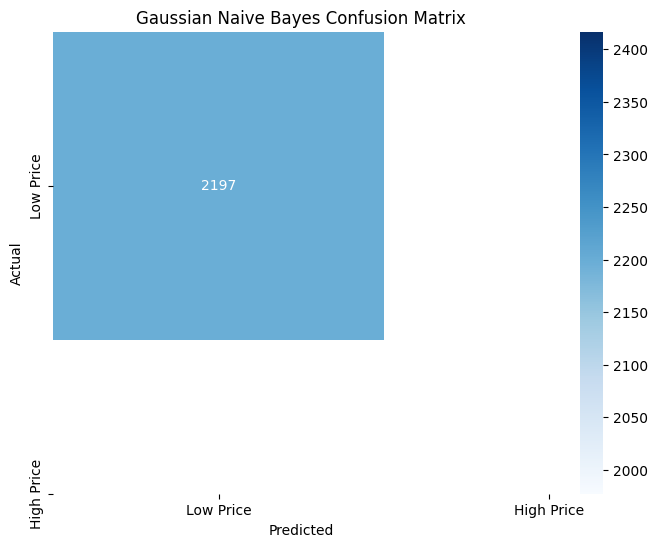

In [335]:
gnb =  HistGradientBoostingClassifier()
gnb.fit(X_train[numeric_columns], y_train)
y_pred_gnb = gnb.predict(X_test[numeric_columns])

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb:.2f}")
print("\nGaussian Naive Bayes Confusion Matrix:")
print(conf_matrix_gnb)
print("\nGaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### 🌳 Decision Tree Classifier

Decision Tree Classifier Accuracy: 1.00

Decision Tree Confusion Matrix:
[[2197]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

   Very High       1.00      1.00      1.00      2197

    accuracy                           1.00      2197
   macro avg       1.00      1.00      1.00      2197
weighted avg       1.00      1.00      1.00      2197



C:\Users\simin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


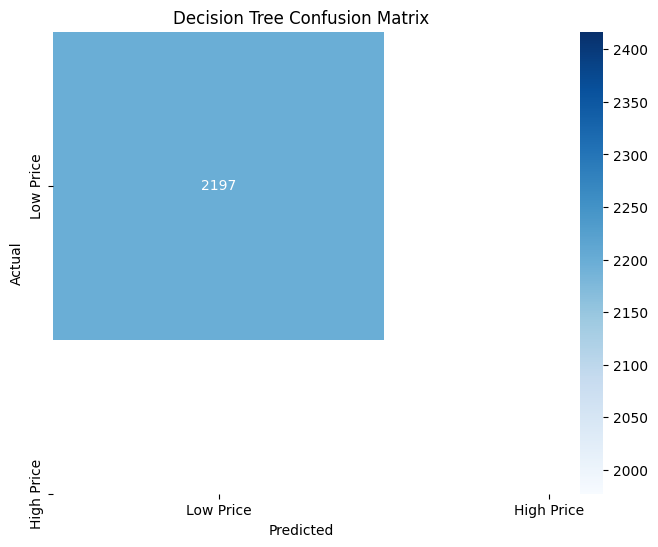

In [336]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit the model using the training data (X_train) and corresponding labels (y_train)
dtc.fit(X_train[numeric_columns], y_train)

# Make predictions using the test set
y_pred_dtc = dtc.predict(X_test[numeric_columns])

# Evaluate the model
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
print(f"Decision Tree Classifier Accuracy: {accuracy_dtc:.2f}")
print("\nDecision Tree Confusion Matrix:")
print(conf_matrix_dtc)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtc))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dtc, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### 🌲🌳 Random Forest Classifier 

Random Forest Classifier Accuracy: 1.00

Random Forest Confusion Matrix:
[[2197]]

Random Forest Classification Report:
              precision    recall  f1-score   support

   Very High       1.00      1.00      1.00      2197

    accuracy                           1.00      2197
   macro avg       1.00      1.00      1.00      2197
weighted avg       1.00      1.00      1.00      2197



C:\Users\simin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


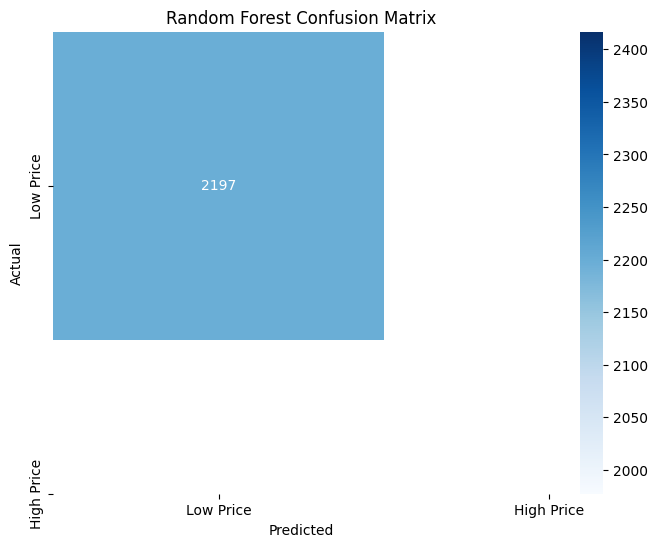

In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42, n_estimators=100)
rfc.fit(X_train[numeric_columns], y_train)  # Fit the model on training data

# Make predictions on X_test (not X_train)
y_pred_rfc = rfc.predict(X_test[numeric_columns])

# Calculate confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

# Calculate accuracy
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Random Forest Classifier Accuracy: {accuracy_rfc:.2f}")

# Print confusion matrix and classification report
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rfc)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rfc))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### ⚡️ Adaptive Boosting

In [338]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# AdaBoost Classifier
abc = AdaBoostClassifier(random_state=42, n_estimators=50)
abc.fit(X_train[numeric_columns], y_train)  # Fit the model on the training data

# Make predictions on X_test (not X_train)
y_pred_abc = abc.predict(X_test[numeric_columns])

# Calculate confusion matrix
conf_matrix_abc = confusion_matrix(y_test, y_pred_abc)

# Calculate accuracy
accuracy_abc = accuracy_score(y_test, y_pred_abc)
print(f"AdaBoost Classifier Accuracy: {accuracy_abc:.2f}")

# Print confusion matrix and classification report
print("\nAdaBoost Confusion Matrix:")
print(conf_matrix_abc)
print("\nAdaBoost Classification Report:")
print(classification_report(y_test, y_pred_abc))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_abc, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ValueError: Input X contains NaN.
AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### ⚡️ XGBoost

In [339]:
from xgboost import XGBClassifier

# XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train[numeric_columns], y_train)
y_pred_xgb = xgb.predict(X_train[numeric_columns])

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"XGBClassifier Accuracy: {accuracy_xgb:.2f}")
print("\nXGBClassifier Confusion Matrix:")
print(conf_matrix_xgb)
print("\nXGBClassifier Classification Report:")
print(classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.title('XGBClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got ['Very High']

### 🛠 From Scratch  
In this subsection, you should implement the SAMME algorithm for adaptive boosting from scratch.Then you should deploy this boosting model and a base estimator, which is Gaussian Naive Bayes here, to classify hotels.

In [340]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.naive_bayes import GaussianNB
import numpy as np

class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=GaussianNB, n_estimators=50):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        n_classes = len(np.unique(y))
        self.weights = (1/n_samples) * np.ones(n_samples, dtype=float) # initialize weights uniformly

        for _ in range(self.n_estimators):
            learner = GaussianNB()  # instantiate model
            learner.fit(X, y, sample_weight=self.weights)  # fit to samples, using weights
            pred = learner.predict(X)  # predict the batch
            missClassified = pred != y  # get index of misclassified samples
            
            # Compute learner error rate according to SAMME algorithm
            learner_error = np.sum(self.weights[missClassified]) / np.sum(self.weights)  # weighted error rate
            
            # If error rate >= 0.5, we discard this learner (worse than random guessing)
            if learner_error >= 0.5:
                continue
            
            # Compute learner weight using SAMME algorithm
            learner_weight = 0.5 * np.log((1 - learner_error) / (learner_error + 1e-10))  # to avoid division by zero
            
            # Increase the weights of misclassified samples according to SAMME algorithm
            self.weights[missClassified] *= np.exp(learner_weight)  # misclassified samples' weights increased
            
            self.weights /= np.sum(self.weights)  # renormalize weights to make them sum up to 1  
            
            # Store the learner and its weight
            self.learners.append(learner)
            self.learner_weights.append(learner_weight)

    def predict(self, X):
        # Collect predictions from each learner
        predictionsOfLearners = np.array([learner.predict(X) for learner in self.learners])
        
        # Compute weighted votes for each class
        weighted_votes = np.zeros((X.shape[0], len(np.unique(predictionsOfLearners))))
        for i, learner in enumerate(self.learners):
            weighted_votes[:, predictionsOfLearners[i]] += self.learner_weights[i]
        
        # Make final prediction by considering the label which has highest weighted vote
        final_predictions = np.argmax(weighted_votes, axis=1)
        
        return final_predictions
